# Load previous data

In [415]:
import pandas as pd
#previous_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_results_a.csv'
previous_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_results_fixed acidity.csv'
previous = pd.read_csv(previous_file, index_col=[0, 1, 2])
print(f'Num results: {previous.shape}')
previous


Num results: (240, 1)


0
recommend predicted                      
False     False     [3.8, 3.97333)      0
                    [3.97333, 4.14667)  0
                    [4.14667, 4.32)     0
                    [4.32, 4.49333)     0
                    [4.49333, 4.66667)  1
...                                    ..
True      True      [13.3333, 13.5067)  0
                    [13.5067, 13.68)    0
                    [13.68, 13.8533)    0
                    [13.8533, 14.0267)  0
                    [14.0267, 14.2]     0

[240 rows x 1 columns]

 # Load previous bins

In [416]:
#bin_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_bins_a.csv'            
bin_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_bins_fixed acidity.csv'            
bins = pd.read_csv(bin_file, index_col=[0], header=None)
bins

,1
0,
0,3.800000
1,3.973333
2,4.146667
3,4.320000
4,4.493333
...,...
56,13.506667
57,13.680000
58,13.853333


# TODO need to test categorical data

# Plot previous data

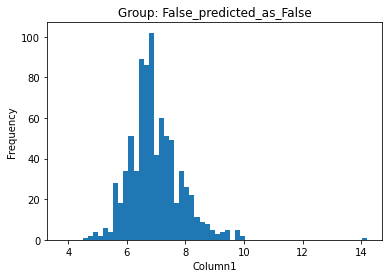

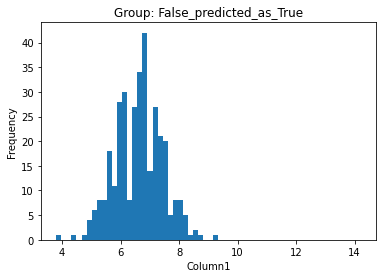

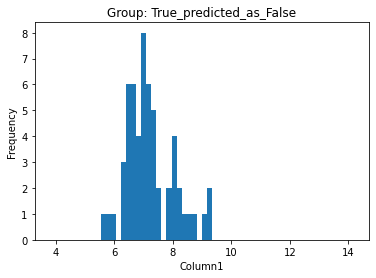

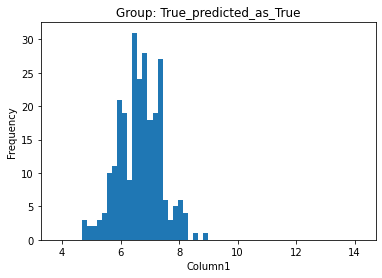

In [417]:
from pandas import MultiIndex
import matplotlib.pyplot as plt

xlab = 'Column1'

for y_true, y_pred in previous.index.droplevel(-1).unique():   
    counts = previous.loc[(y_true, y_pred)]
    b = bins.values

    plt.hist(
        (b[:-1] + b[1:]) / 2,
        bins=len(counts.values),
        weights=counts.values,
        range=(b.min(), b.max()),
    )
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.title(f"Group: {y_true}_predicted_as_{y_pred}")

    plt.show(block=False)

# Load new data

In [418]:
import pandas as pd
#previous_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_results_a.csv'
new_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_results_fixed acidity_new.csv'
new = pd.read_csv(new_file, index_col=[0, 1, 2])
print(f'Num results: {new.shape}')
new

Num results: (240, 1)


0
recommend predicted                      
False     False     [3.8, 3.97333)      0
                    [3.97333, 4.14667)  0
                    [4.14667, 4.32)     0
                    [4.32, 4.49333)     0
                    [4.49333, 4.66667)  1
...                                    ..
True      True      [13.3333, 13.5067)  0
                    [13.5067, 13.68)    0
                    [13.68, 13.8533)    0
                    [13.8533, 14.0267)  0
                    [14.0267, 14.2]     0

[240 rows x 1 columns]

# Load new bins

In [419]:
#bin_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_bins_a.csv'            
new_bin_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_bins_fixed acidity_new.csv'            
new_bins = pd.read_csv(bin_file, index_col=[0], header=None)
new_bins

,1
0,
0,3.800000
1,3.973333
2,4.146667
3,4.320000
4,4.493333
...,...
56,13.506667
57,13.680000
58,13.853333


# Plot new data

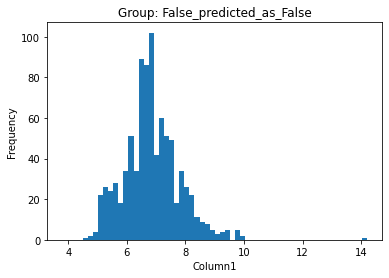

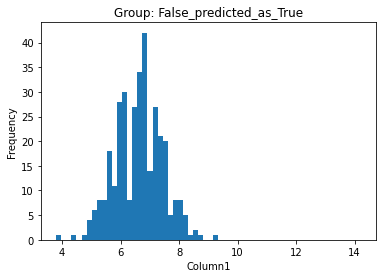

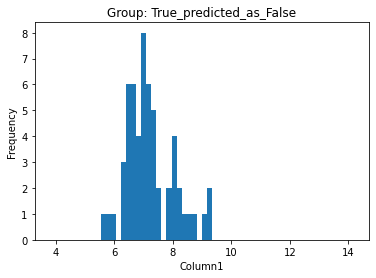

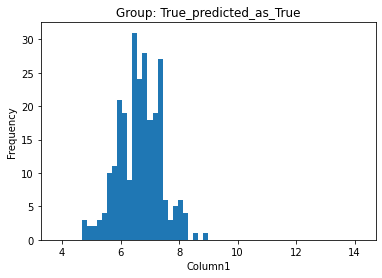

In [420]:
from pandas import MultiIndex
import matplotlib.pyplot as plt

xlab = 'Column1'

for y_true, y_pred in new.index.droplevel(-1).unique():   
    counts = new.loc[(y_true, y_pred)]
    b = new_bins.values

    plt.hist(
        (b[:-1] + b[1:]) / 2,
        bins=len(counts.values),
        weights=counts.values,
        range=(b.min(), b.max()),
    )
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.title(f"Group: {y_true}_predicted_as_{y_pred}")

    plt.show(block=False)

# Plot previous and new overlaid

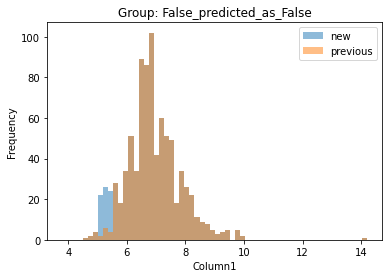

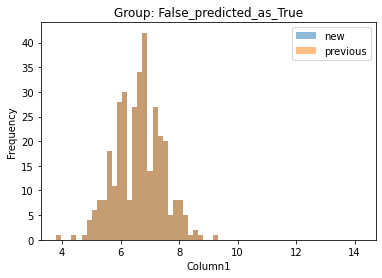

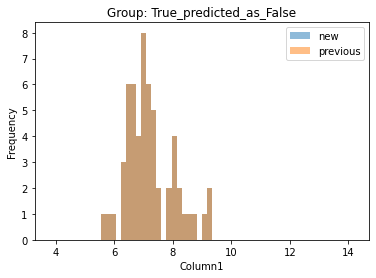

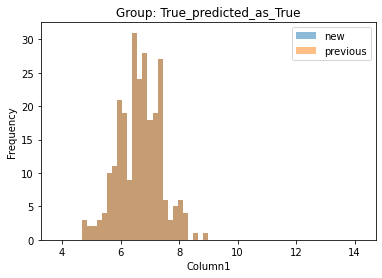

In [421]:
for y_true, y_pred in new.index.droplevel(-1).unique():   
    new_counts = new.loc[(y_true, y_pred)]
    new_b = new_bins.values

    prev_counts = previous.loc[(y_true, y_pred)]
    b = bins.values
    
    plt.hist(
        (new_b[:-1] + new_b[1:]) / 2,
        bins=len(new_counts.values),
        weights=new_counts.values,
        range=(new_b.min(), new_b.max()),
        alpha=0.5,
        label='new'
    )
          
    plt.hist(
        (b[:-1] + b[1:]) / 2,
        bins=len(prev_counts.values),
        weights=prev_counts.values,
        range=(b.min(), b.max()),
        alpha=0.5,
        label='previous'
    )
    
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.title(f"Group: {y_true}_predicted_as_{y_pred}")
    plt.legend(loc='upper right')

    plt.show(block=False)
    